# Keras Basic Tools for Deep Neural Network (DNN) 

### What is Keras ?
- Keras is a powerful and easy-to-use free open source Python library for developing and evaluating neural networking models.
- It is part of the TensorFlow library and allows you to define and train neural network (NN) models in just a few lines of code.

### What is the version of Keras used in this tutorial ?
- **Keras** can be accessed either as a dependent module within **TensorFlow** or independently as a standalone framework. 
> For this notebook, we are utilizing **TensorFlow** and **Keras**, with versions '2.14.0', and '2.12.0' respectively. 

In [1]:
import tensorflow as tf
# from tensorflow import keras
import keras
print("The version of tensorflow is : ", tf.__version__)
print("The version of keras is : ", keras.__version__)


The version of tensorflow is :  2.14.0
The version of keras is :  2.12.0


### What are the fundamental steps involved in constructing a neural network (NN) model using Keras? 
1. Load Data
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model
5. Evaluate Keras Model
6. Make Predictions
7. Saving and loading the model architecture
8. flowchart for our NN model (Optional)

> let's start our journey to build our NN model step by step 

### 1. Load Data

* **MNIST dataset**
    * We are using here in this notebook **MNIST dataset** in Keras, which is a widely used benchmark dataset for handwritten digit recognition. 
    * The dataset encompasses grayscale images of handwritten digits (0 through 9) each image is 28x28 pixels,
    * You can use one of other ways to load the dataset from keras or tf.keras 

In [2]:
mnist = tf.keras.datasets.mnist
# Or
# mnist = keras.datasets.mnist

> We will divide our data into training and testing sets for the purpose of building our model

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('X Train Shape is : ' , x_train.shape)
# print('X Train  is : ' , x_train[1])
print('---------------------------------------- ')
print('X Test Shape is : ' , x_test.shape)
# print('X Test  is : ' , x_test[1])
print('---------------------------------------- ')
print('y Train Shape is : ' , y_train.shape)
# print('y Train is : ' , y_train[5])
print('---------------------------------------- ')
print('y Test Shape is : ' , y_test.shape)
# print('y Test  is : ' , y_test[5])

X Train Shape is :  (60000, 28, 28)
---------------------------------------- 
X Test Shape is :  (10000, 28, 28)
---------------------------------------- 
y Train Shape is :  (60000,)
---------------------------------------- 
y Test Shape is :  (10000,)


### 2. Define Keras Model

- The initial stage in constructing your neural network model with Keras involves creating a model object using the **Sequential** class. Subsequently, we incrementally incorporate layers into our model until we achieve the desired architecture for our neural network.

In [4]:
NN_first_model = tf.keras.models.Sequential()

* Add the input layer : using the Flatten class. 
    * it is named "Flatten" layer because it serves the purpose of flattening or reshaping the input data.
    * The Flatten layer is typically used to transform multidimensional input into a one-dimensional array.
    * This means that each image of our dataset (28x28 pixels images) will be one vector
    * make sure that the input layer has the correct number of input features using the argument **input_shape**


In [5]:
NN_first_model.add(tf.keras.layers.Flatten())

* Add Fully connected hidden layers : using the Dense class
    * The term "dense" refers to a densely connected layer. 
    * A densely connected layer is a type of layer where each neuron or node in the layer is connected to every neuron in the previous layer.
    * A tricky question here is, How do we know the number of layers and their types?
    * You can specify the number of neurons or nodes in the layer as the first argument 
    * Also the activation function can specify using the activation argument (**activation =  softmax  , elu , relu , tanh , sigmoid , linear**)
* The activation function: 
    * It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. 
    * These days, better performance is achieved using the **ReLU** activation function. 
    * Using a sigmoid on the output layer ensures your network output is between 0 and 1 (Binary Classification).
    * For Multi Classification we use **softmax** as activation function. 

In [6]:
NN_first_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

* Dropout some of the layers : Using **Dropout** class 
    * Sometimes, in order to address the issue of **overfitting** in our neural network model, we can mitigate it by selectively dropping out neurons from our network.
    * **Overfitting** occurs when a model learns the training data too well, capturing noise or random fluctuations in the data that do not generalize well to new, unseen data. 
    * The overfitting can lead to a drop in performance when the model is applied to new datasets, a phenomenon typically detected during the testing phase of our NN model.
    * **Dropout** is a regularization technique that addresses overfitting by randomly "dropping out" a proportion of neurons during training.
    * You can control the neurons that will be drop from you NN with a dropout rate argument such as 0.5

In [7]:
NN_first_model.add(tf.keras.layers.Dropout(0.2))

* Add the output layer : using the Dense class. 
    * You have to decide the number of nodes in the output layer based on the case of study 
    * If it is binary classification  between 0 and 1, so better to use **sigmoid** function as activation function 
    * If it is Multi Classification (Like our current example we have 10 possible outputs), so better to use **softmax** function as activation function 

In [8]:
NN_first_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

                              " However, We can define our model one time "

In [9]:
NN_first_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                   ])

> --> Once the model has been defined, the next step is to compile it. -->

### 3. Compile Keras Model

* What does it mean to compile the model?
    * Compiling the model mean uses the efficient numerical libraries under the covers (the so-called backend) such as TensorFlow to configure the learning process before training the model. 
    * The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU, GPU, or even distributed.
* Several parameters that define how the model will learn and adapt to the training data should be adjusted during compiling our model 
    * **Optimizer** : The optimization algorithm that adjusts the weights of the NN during training. 
        * Optimizer options :  SGD, Adam, and RMSprop.
    * **Loss Function** : It serves as a guide for the optimizer to minimize the error.
        * The choice of the loss function depends on the type of problem \
               - for regression --> **mse** \
               - for binary classification  --> **binary_crossentropy** \
               - for multi classification  --> **sparse_categorical_crossentropy**
    * **Metrics** : Metrics are used to evaluate the performance of the model during training.
        * for regression --> **mae**
        * for classification --> **accuracy**
* **adam** is the efficient stochastic gradient descent algorithm.
    * This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 


In [10]:
NN_first_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

> --> Once the model is compiled, it is ready for training -->

### 4. Fit Keras Model

- You have defined your model and compiled it to get ready for efficient computation.

* What actually happen in the fitting process?
    * Fitting the model involves training the NN on a given dataset. 
    * You can train or fit your model on your loaded data by calling the *fit()* function on the model.
    * The *fit* function is used to iteratively adjust the model's weights based on the training data, optimizing it to make accurate predictions.
    * Training occurs over epochs, and each epoch is split into batches.
        * Epoch: One pass through all of the rows in the training dataset, you can control by *epochs* argument.
        * Batch: The number of samples considered by the model within an epoch before weights are updated, you can control by *batch_size* argument.
* What does it mean the model convergence ?
    * "convergence" refers to the point at which the model has reached an optimal or stable state in terms of learning from the training data.
    * As a result, we are trying to choose these configurations (epochs, and batch_size) experimentally by trial and error.
    * During each iteration (or epoch) of training, the model adjusts its internal parameters (weights and biases) to minimize a defined loss function. 
    * The concept of convergence is closely related to the optimization process that occurs during model training.
    * The optimization algorithm aims to find the optimal set of parameters that result in the best fit to the training data.
    * We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. 
    * The model will always have some error, but the amount of error will level out after some point for a given model configuration.
    * When a model converges, it means that further training iterations are unlikely to significantly improve its performance on the training dataset.

In [11]:
NN_first_model.fit(x_train, y_train, epochs=10,  batch_size=1000)

Epoch 1/10
16/60 [=======>......................] - ETA: 0s - loss: 49.7291 - accuracy: 0.4480 

60/60 [==============================] - 0s 3ms/step - loss: 17.3571 - accuracy: 0.6857
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.7123 - accuracy: 0.7602
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.7810
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.8107
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.8319
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.8468
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.8573
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.8695
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8796
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.8881


> --> Congratulations!, Once our model has been trained on the data, Now, we can assess its performance on any test data. -->


### 5. Evaluate Keras Model


* What does it mean to evaluate the model?
    * Assessing its performance on a separate dataset, typically a validation set or a test set!
    * You can evaluate your model on your test dataset using the *evaluate()* function.
    * This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.
    * The evaluate() function will return a list with two values. 
        * The first will be the loss of the model on the dataset. 
        * The second will be the accuracy of the model on the dataset.

In [12]:
test_loss, test_acc = NN_first_model.evaluate(x_test, y_test)
print('The accuracy of our model on test dataset : %.2f' % (test_acc*100))
print('The loss of our model on test dataset : %.2f' % (test_loss*100))

313/313 [==============================] - 0s 399us/step - loss: 0.4355 - accuracy: 0.9117
The accuracy of our model on test dataset : 91.17
The loss of our model on test dataset : 43.55


* our observation on the results:
    * The accuracy of the model is low, Why?
    * The main reason for that --> we are using the DNN with image related example, while the CNN is the better option of such kind of examples, so in another tutorial we will try the CNN and see what is the difference

> After successfully training and evaluating your model, you can leverage it to make predictions on new data. 

### 6. Make Predictions with our model

*  What does it mean to make prediction using your prepared model?
     * I use it to generate predictions on a new dataset you have not seen before.
     * here, we are using test data as example. 
     * Making predictions is as easy as calling the predict() function on the model. 
     * To easily handle the multi prediction for this classification task we can rounding them

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

> Executing the prediction function once over the entire dataset will generate predictions that can be accessed from the output array

In [14]:
predictions = NN_first_model.predict(x_test)

313/313 [==============================] - 0s 333us/step


> Let's see some cases and compare! you try any image number here as you want

The model predict the image as it is number :  9
And, the real image as follows 


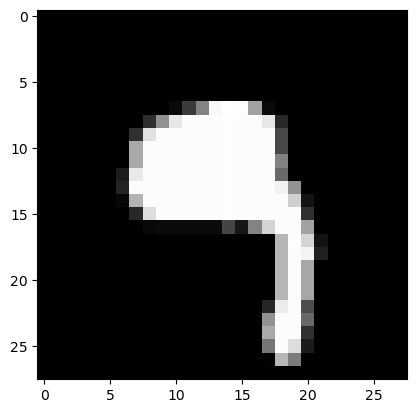

In [30]:
image_no = 209 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
print("The model predict the image as it is number : ", model_prediction)
print("And, the real image as follows ")
plt.imshow(x_test[image_no], cmap='gray');

> ##### Important Note : 
Our DNN model is not so good in prediction, already the efficiency is around 50 and we discussed the reason.  
We can see an example for the model identified this image as number 2 in some trials


|![](images/prediction_DNN.png) |
| :--: |
| Real Image for Number 3 | 

&nbsp;

> To utilize your well-prepared model in the future, it's essential to save it.

### 7. Saving and loading the model architecture

* After training, validation, and configuration, Why we need to save our model ?
    * Load the model when needed for predictions, further training, or sharing with others.
* Saving a Keras model in HDF5 format **(.h5 file)** is a common and preferred practice, Why? \
  For many reasons such as : 
    * Unified Storage : Saving the entire model in a single HDF5 file consolidates both the model architecture and the learned weights into one file. This simplifies storage and management.
    * Portability: The HDF5 format is platform-independent and widely supported across different programming languages, which making it portable across different systems.
    * Comprehensive Support in Keras: Keras provides a built-in save method that uses the HDF5 format by default. The load_model function in Keras is designed to work seamlessly with models saved in HDF5 format.
    * Compatibility with TensorFlow and Other Libraries: TensorFlow, the backend for Keras, also supports the HDF5 format. 
    * Metadata Storage: HDF5 files can store additional metadata, such as optimizer configuration, training configuration, and compile-time information.

In [16]:
NN_first_model.save('my_NN_first_model.h5')

> Load the model for future use 

In [17]:
new_model = keras.models.load_model('my_NN_first_model.h5')

> Again we can check the model performance for the test dataset 

In [18]:
test_loss, test_acc = new_model.evaluate(x_test, y_test)
print('The accuracy of our model on test dataset : %.2f' % (test_acc*100))
print('The loss of our model on test dataset : %.2f' % (test_loss*100))

  1/313 [..............................] - ETA: 14s - loss: 0.0602 - accuracy: 1.0000

313/313 [==============================] - 0s 446us/step - loss: 0.4355 - accuracy: 0.9117
0.43548744916915894
0.9117000102996826


> Again we can use the loaded model to predict data

In [19]:
new_predictions = new_model.predict(x_test)

313/313 [==============================] - 0s 348us/step


> Let's see some cases and compare for the new prediction! 

The model predict the image as it is number :  3
And, the real image as follows 


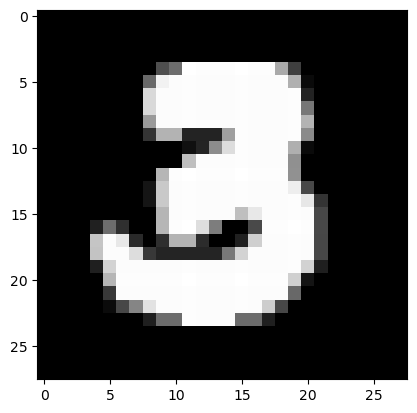

In [20]:
image_no = 200 # you can change the image number as you want

model_prediction = np.argmax(predictions[image_no])
print("The model predict the image as it is number : ", model_prediction)
print("And, the real image as follows ")
plt.imshow(x_test[image_no], cmap='gray');

### 8. flowchart for our NN model 

- How to create a flowchart for your NN model ?
    * Using **plot_model** function from Keras, which is part of the **keras.utils** module.
    * This function can create a visual representation of your model architecture which built by CNN or DNN 
- what is the important parameters for this plot function?
    * **model**: A Keras model instance
    * **to_file**: File name of the plot image.
    * **show_shapes**: whether to display shape information.
    * **show_layer_names**: whether to display layer names.
    * **rankdir**: '*TB*' creates a vertical plot; '*LR*' creates a horizontal plot.
    * **dpi**: Dots per inch.
    * **show_layer_activations**: Display layer activations.



In [21]:
from keras.utils import plot_model

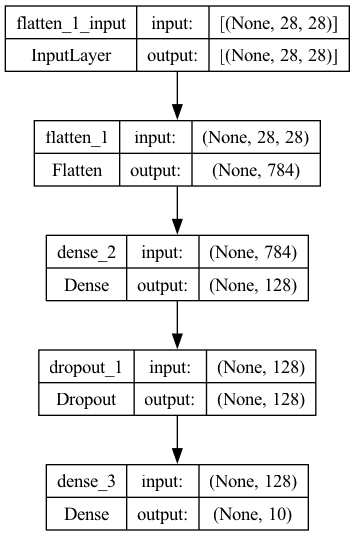

In [22]:
plot_model(NN_first_model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

> **Last Note** : 
* Neural networks are stochastic algorithms, meaning that the same algorithm on the same data can train a different model with different skill each time the code is run. This is a feature, not a bug.

&nbsp;

### Further Keras Applications for DNN 
--------------------------------------
[Case Study No 1](DNN_case_studies/Keras_CaseStudy_no1.ipynb) : To understand how to apply rescaling to data.

[Case Study No 2](DNN_case_studies/Keras_CaseStudy_no2.ipynb) : To observe the impact of increasing the number of hidden layers on the model's accuracy.

[Case Study No 3](DNN_case_studies/Keras_CaseStudy_no3.ipynb) : For image classification tasks involving fashion items, a challenging dataset is employed. 

[Case Study No 4](DNN_case_studies/Keras_CaseStudy_no4.ipynb) : Utilizing Keras to construct a DNN for a regression model allows for the observation of early stopping in action.

[Case Study No 5](DNN_case_studies/Keras_CaseStudy_no5.ipynb) : Dogs & Cats classifications to assess whether DNN  can effectively handle the image data or not! 

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="article read" href="https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/"> Your First Deep Learning Project in Python with Keras Step-by-Step, Machine Learning Mastery. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>

